# Aplikacja Tomografu
## Paweł Mazurkiewicz 156145
## Filip Michalski 155947

In [52]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import glob
import os
import math

# Algorytm Bresenhama


In [53]:
def bresenham(x0, y0, x1, y1):
    dx = x1 - x0
    dy = y1 - y0

    xsign = 1 if dx > 0 else -1
    ysign = 1 if dy > 0 else -1

    dx = abs(dx)
    dy = abs(dy)

    if dx > dy:
        xx, xy, yx, yy = xsign, 0, 0, ysign
    else:
        dx, dy = dy, dx
        xx, xy, yx, yy = 0, ysign, xsign, 0

    D = 2 * dy - dx
    y = 0

    for x in range(dx + 1):
        yield x0 + x * xx + y * yx, y0 + x * xy + y * yy
        if D >= 0:
            y += 1
            D -= 2 * dx
        D += 2 * dy
        
def simulate_ray(image, x_e, y_e, x_d, y_d):
    height, width = image.shape
    total = 0

    # Sumujemy wartości pikseli wzdłuż promienia
    for x, y in bresenham(int(round(x_e)), int(round(y_e)), int(round(x_d)), int(round(y_d))):
        if 0 <= x < width and 0 <= y < height:
            total += image[y, x]
    return total

Przetwarzam plik: ./images/Kropka.dcm


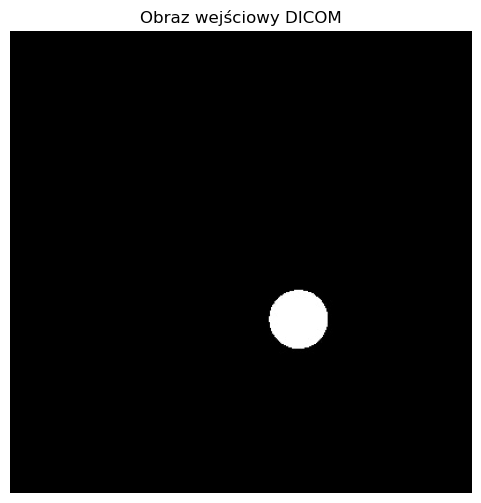

0.0
482.842712474619 200.0
1.0027855153203342
482.7993938408023 204.95003467410157
2.0055710306406684
482.66945120823937 209.89855310804583
3.0083565459610027
482.4529243795277 214.84403952611348
4.011142061281337
482.14987967878307 219.78497908131897
5.013927576601671
481.760409931324 224.71985831942172
6.016713091922005
481.2846344352381 229.64716564251086
7.0194986072423395
480.7226989248406 234.56539177202114
8.022284122562674
480.07477552603416 239.4730302110387
9.025069637883007
479.3410627035854 244.36857770575446
10.027855153203342
478.52178520033317 249.2505347059244
11.030640668523677
477.617193968348 254.11740582419526
12.03342618384401
476.62756609206303 258.9677002941551
13.036211699164344
475.5532047034007 263.7999324269686
14.038997214484679
474.3944388889206 268.61262206645665
15.041782729805014
473.15162358901745 273.40429504248186
16.044568245125348
471.8251394891995 278.1734836224998
17.04735376044568
470.4153929034812 282.918726961139
18.050139275766014
468.92281564

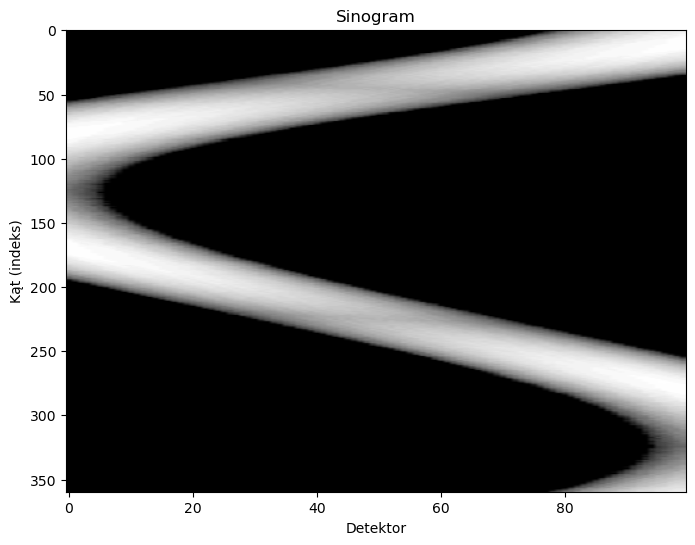

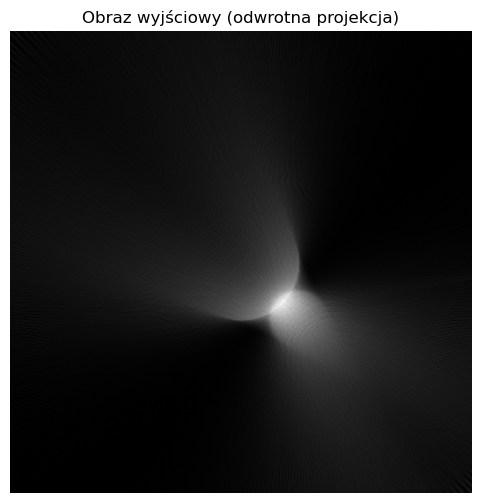

Przetwarzam plik: ./images/CT_ScoutView.dcm


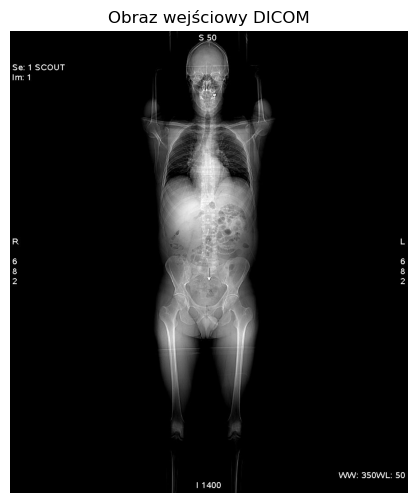

0.0
1115.0881423932728 512.0
1.0027855153203342
1114.984749607302 523.8147279938188
2.0055710306406684
1114.6746029195294 535.6258370301531
3.0083565459610027
1114.1577973306762 547.429709260038
4.011142061281337
1113.4344911429444 559.222729051207
5.013927576601671
1112.5049059115265 571.0012840955936
6.016713091922005
1111.3693263767427 582.7617665158133
7.0194986072423395
1110.0281003768223 594.500573970289
8.022284122562674
1108.4816387413553 606.2141107566804
9.025069637883007
1106.7304151654553 617.8987889132804
10.027855153203342
1104.7749660646596 629.55102931804
11.030640668523677
1102.6158904106212 641.1672627848853
12.03342618384401
1100.2538495476388 652.7439311569913
13.036211699164344
1097.6895669900807 664.2774883966774
14.038997214484679
1094.9238282007655 675.7644016715913
15.041782729805014
1091.9574803503683 687.2011524368463
16.044568245125348
1088.791432057925 698.5842375127838
17.04735376044568
1085.426653112513 709.9101701580289
18.050139275766014
1081.8641741761

KeyboardInterrupt: 

In [54]:
folder_path = "./images"
dicom_files = glob.glob(os.path.join(folder_path, "*.dcm"))

# Parametry symulacji: 
# ∆α (w stopniach), liczba kątów, liczba detektorów oraz długość układu detektorów (w pikselach)
delta_alpha = 1         # krok obrotu w stopniach (możesz zmieniać)
num_angles = int(360 / delta_alpha)
num_detectors = 100     # liczba detektorów
detector_length = 200   # rozpiętość układu detektorów (w pikselach)

for file_path in dicom_files:
    print(f"Przetwarzam plik: {file_path}")

    # Wczytanie i normalizacja obrazu DICOM
    ds = pydicom.dcmread(file_path)
    pixel_array = ds.pixel_array
    normalized = ((pixel_array - np.min(pixel_array)) / (np.max(pixel_array) - np.min(pixel_array)) *255).astype(np.uint8)

    # Wyświetlenie obrazu wejściowego
    plt.figure(figsize=(6,6))
    plt.imshow(normalized, cmap='gray')
    plt.title("Obraz wejściowy DICOM")
    plt.axis("off")
    plt.show()

    height, width = normalized.shape
    center_x, center_y = width / 2, height / 2

    # Ustalamy promień okręgu symulacyjnego tak, aby obejmował cały obraz (tu: przekątna/2 plus margines)
    R = math.hypot(width, height) / 2 

    # Inicjujemy macierz sinogramu: każdy wiersz odpowiada jednemu kątowi,
    # a każda kolumna – pozycji jednego detektora
    sinogram = np.zeros((num_angles, num_detectors))

    # Rekonstrukcja przez odwrotną projekcję - obraz wyjściowy
    reconstruction = np.zeros_like(normalized, dtype=np.float64)

    # Przetwarzamy każdy kąt
    for angle_idx, alpha in enumerate(np.linspace(0, 360, 360)):
        theta = math.radians(alpha)
        print(alpha)
        # Pozycja emitera - na okręgu wokół obrazu
        x_e = center_x + R * math.cos(theta)
        y_e = center_y + R * math.sin(theta)
        print(x_e, y_e)

        # Pozycja centralna detektorów (przeciwna strona)
        x_center_detector = center_x - R * math.cos(theta)
        y_center_detector = center_y - R * math.sin(theta)

        # Kierunek układu detektorów: prostopadły do promienia (wektor jednostkowy)
        det_dir_x = -math.sin(theta)
        det_dir_y = math.cos(theta)

        # Przechodzimy po każdym detektorze
        for det_idx in range(num_detectors):
            # Obliczamy przesunięcie wzdłuż linii detektorów
            # Pozycja od -l/2 do +l/2
            s = -detector_length/2 + det_idx * (detector_length/(num_detectors-1))
            # Pozycja danego detektora
            x_d = x_center_detector + s * det_dir_x
            y_d = y_center_detector + s * det_dir_y

            # Symulujemy promień dla danej pary emiter-detektor
            ray_value = simulate_ray(normalized, x_e, y_e, x_d, y_d)
            sinogram[angle_idx, det_idx] = ray_value

            # Odwrotna projekcja (prostą metodą dodajemy wartość promienia do pikseli, które promień przecina)
            for x, y in bresenham(int(round(x_e)), int(round(y_e)), int(round(x_d)), int(round(y_d))):
                if 0 <= x < width and 0 <= y < height:
                    reconstruction[y, x] += ray_value

    # Normalizacja sinogramu do zakresu 0-255 dla wizualizacji
    sinogram_norm = ((sinogram - sinogram.min()) / (sinogram.max() - sinogram.min()) * 255).astype(np.uint8)
    plt.figure(figsize=(8,6))
    plt.imshow(sinogram_norm, cmap='gray', aspect='auto')
    plt.title("Sinogram")
    plt.xlabel("Detektor")
    plt.ylabel("Kąt (indeks)")
    plt.show()

    # Normalizacja rekonstrukcji
    reconstruction_norm = ((reconstruction - reconstruction.min()) / (reconstruction.max() - reconstruction.min()) * 255).astype(np.uint8)
    plt.figure(figsize=(6,6))
    plt.imshow(reconstruction_norm, cmap='gray')
    plt.title("Obraz wyjściowy (odwrotna projekcja)")
    plt.axis("off")
    plt.show()